In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import libraries for linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

# import library for preparing data
from sklearn.model_selection import train_test_split

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('used_cars.csv')

In [3]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [4]:
df.shape

(7253, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [6]:
df.isnull().sum()

,0
S.No.,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,46


In [7]:
df.duplicated().sum()

np.int64(0)

*   There are missing values in columns 8-13
*   The New_price column has too many nulls, making it unreliable and will need to be removed
*   Other rows with missing values will also need to be imputed or removed
*   There are no duplicates

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,7253.0,3626.000000,2093.905084,0.00,1813.000,3626.00,5439.0000,7252.00
Year,7253.0,2013.365366,3.254421,1996.00,2011.000,2014.00,2016.0000,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.000,53416.00,73000.0000,6500000.00
Mileage,7251.0,18.141580,4.562197,0.00,15.170,18.16,21.1000,33.54
Engine,7207.0,1616.573470,595.285137,72.00,1198.000,1493.00,1968.0000,5998.00
Power,7078.0,112.765214,53.493553,34.20,75.000,94.00,138.1000,616.00
Seats,7200.0,5.280417,0.809277,2.00,5.000,5.00,5.0000,10.00
New_price,1006.0,22.779692,27.759344,3.91,7.885,11.57,26.0425,375.00
Price,6019.0,9.479468,11.187917,0.44,3.500,5.64,9.9500,160.00


*   S.No.
    *   There are 7,253 serial numbers in the database
    *   Are these all unique or is there duplicate data?

*   Year
    *   The average year of the cars is 2013
    *   The min year is 1996 but the majority of the cars are 2011 and newer. This could suggest some outliers in the data.
    *   The max year is 2019
    *   Median is 2014

*   Kilometers_Driven
    *   The average km driven is ~58,699km
    *   The min is 171km
    *   The max is 6,500,000km. This may be a mistake as the # is unusally high
    *   75% of the km driven is 73,000km and under, so the max is probably an unsual outlier or the data was miskeyed.
    *   Median is 53,416km

*   Mileage
    *   Missing data
    *   Average mileage is ~18km/kg
    *   It is odd for the min to be 0. How many cars have 0 mileage?
    *   Median is 18.16

*   Engine
    *   Missing data
    *   The range of the displacement volume of the engine is 72 and 5,998 which is a large range in comparison to the mean
    *   The average is ~1616
    *   Median is 1,493

*   Power
    *   Missing data
    *   Average is 112
    *   Median is 94

*   Seats
    *   Missing data
    *   50% of the cars have 5 seats
    *   Min is 2, Max is 10
    *   Median is 5

*   New_price
    *   Missing data
    *   There are only 1,006 records with a new price assigned.
    *   This variable is unusable
*   Price
    *   Missing data
    *   The average price of used cars is ~948,000 INR
    *   The range is 44,000 INR and 16,000,000 INR
    *   The average is ~.05% of the max price. The max could have been miskeyed.
    *   75% of the are prices are 995,000 INR and under.
    *   Median is 563,000 INR

In [9]:
cat_vars = ["Name", "Location", "Fuel_Type", "Transmission", "Owner_Type", "Year", "Seats"]

for column in cat_vars:
    print(df[column].value_counts())
    print("-" * 50)

Name
Mahindra XUV500 W8 2WD                   55
Maruti Swift VDI                         49
Maruti Swift Dzire VDI                   42
Honda City 1.5 S MT                      39
Maruti Swift VDI BSIV                    37
                                         ..
Mercedes-Benz E-Class E240 V6 AT          1
Nissan Terrano XE 85 PS                   1
Mahindra TUV 300 2015-2019 T8 AMT         1
Hyundai i20 2015-2017 1.4 CRDi Sportz     1
Hyundai Creta 1.6 VTVT Base               1
Name: count, Length: 2041, dtype: int64
--------------------------------------------------
Location
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: count, dtype: int64
--------------------------------------------------
Fuel_Type
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: count, dtype: int64
---------------

*   Name has 2041 unique values. This will need to be broken out by Brand and Model separately.
*   The top 5 Locations make up ~57% of the used car market
*   The top 7 locations make up ~75%
*   Fuel Type of cars are mainly Diesel and Petrol
*   Transmission of cars is mostly manual but there is still a significant amount of Automatic cars
*   Owner Type is mostly First (82%) and then Second (15.9%)
*   Majority of used cars are 2011 and newer (~70%)
*   84% percent of the cars have 5 seats

In [10]:
df.nunique()

,0
S.No.,7253
Name,2041
Location,11
Year,23
Kilometers_Driven,3660
Fuel_Type,5
Transmission,2
Owner_Type,4
Mileage,438
Engine,150


*   There are 7253 unique serial #'s in the dataset
*   There are way too many unique values for Name since it's a categorical variable
*   I was expecting the numerical variables to have closer to 6k unique values since there are 7k unique cars, so it is interesting that the counts are much lower. These cars seems to share a lot of the same specs.
*   There are 23 years which make sense since the years range from 1996 to 2019

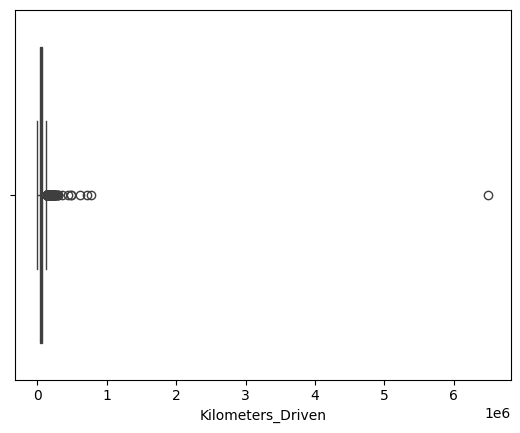

In [11]:
# Checking for extreme values for KM Driven
sns.boxplot(data=df,x='Kilometers_Driven')
plt.show()

* The max value of KM Driven is a very unrealistic outlier (6,500,000km)
* This will need to be removed from the data

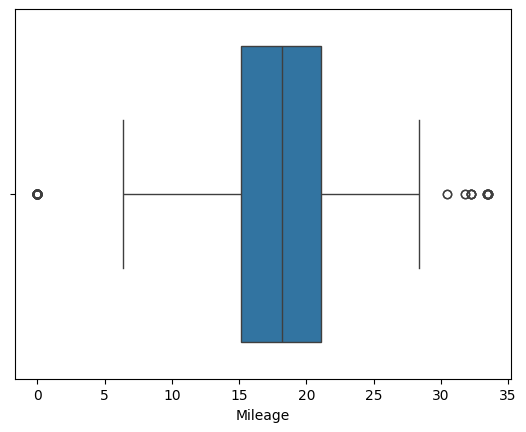

In [12]:
# Checking for extreme values for Mileage
sns.boxplot(data=df,x='Mileage')
plt.show()

* Mileage of 0 is unrealistic and will need to be removed or imputed

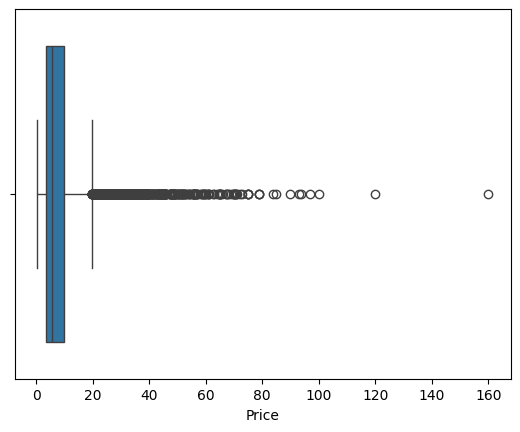

In [13]:
# Checking for extreme values for Price
sns.boxplot(data=df,x='Price')
plt.show()

* The max of 16,000,000 INR seemed unrealistic when looking at the summary statistics, but looking at the boxplot and thinking of how expensive cars can be, it could be feasible.

In [14]:
# Checking car info for max price plot
df.iloc[df.Price.idxmax()]

,4079
S.No.,4079
Name,Land Rover Range Rover 3.0 Diesel LWB Vogue
Location,Hyderabad
Year,2017
Kilometers_Driven,25000
Fuel_Type,Diesel
Transmission,Automatic
Owner_Type,First
Mileage,13.33
Engine,2993.0


* Price seems to be realistic for car brand/model, so I will not be removing outliers for Price

In [15]:
# Looking for Record of KM Drive outlier
df.sort_values(by='Kilometers_Driven', ascending=False).head(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2328,2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,NaN,65.0
340,340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.5
1860,1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.9
358,358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.7
2823,2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.0


In [16]:
# Removing 6,500,000km from KM Driven

df.drop([2328], inplace=True)

In [17]:
# Checking to make sure it was dropped

df.sort_values(by='Kilometers_Driven', ascending=False).head(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
340,340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.5
1860,1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.9
358,358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.7
3092,3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,NaN,5.0
2823,2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.0


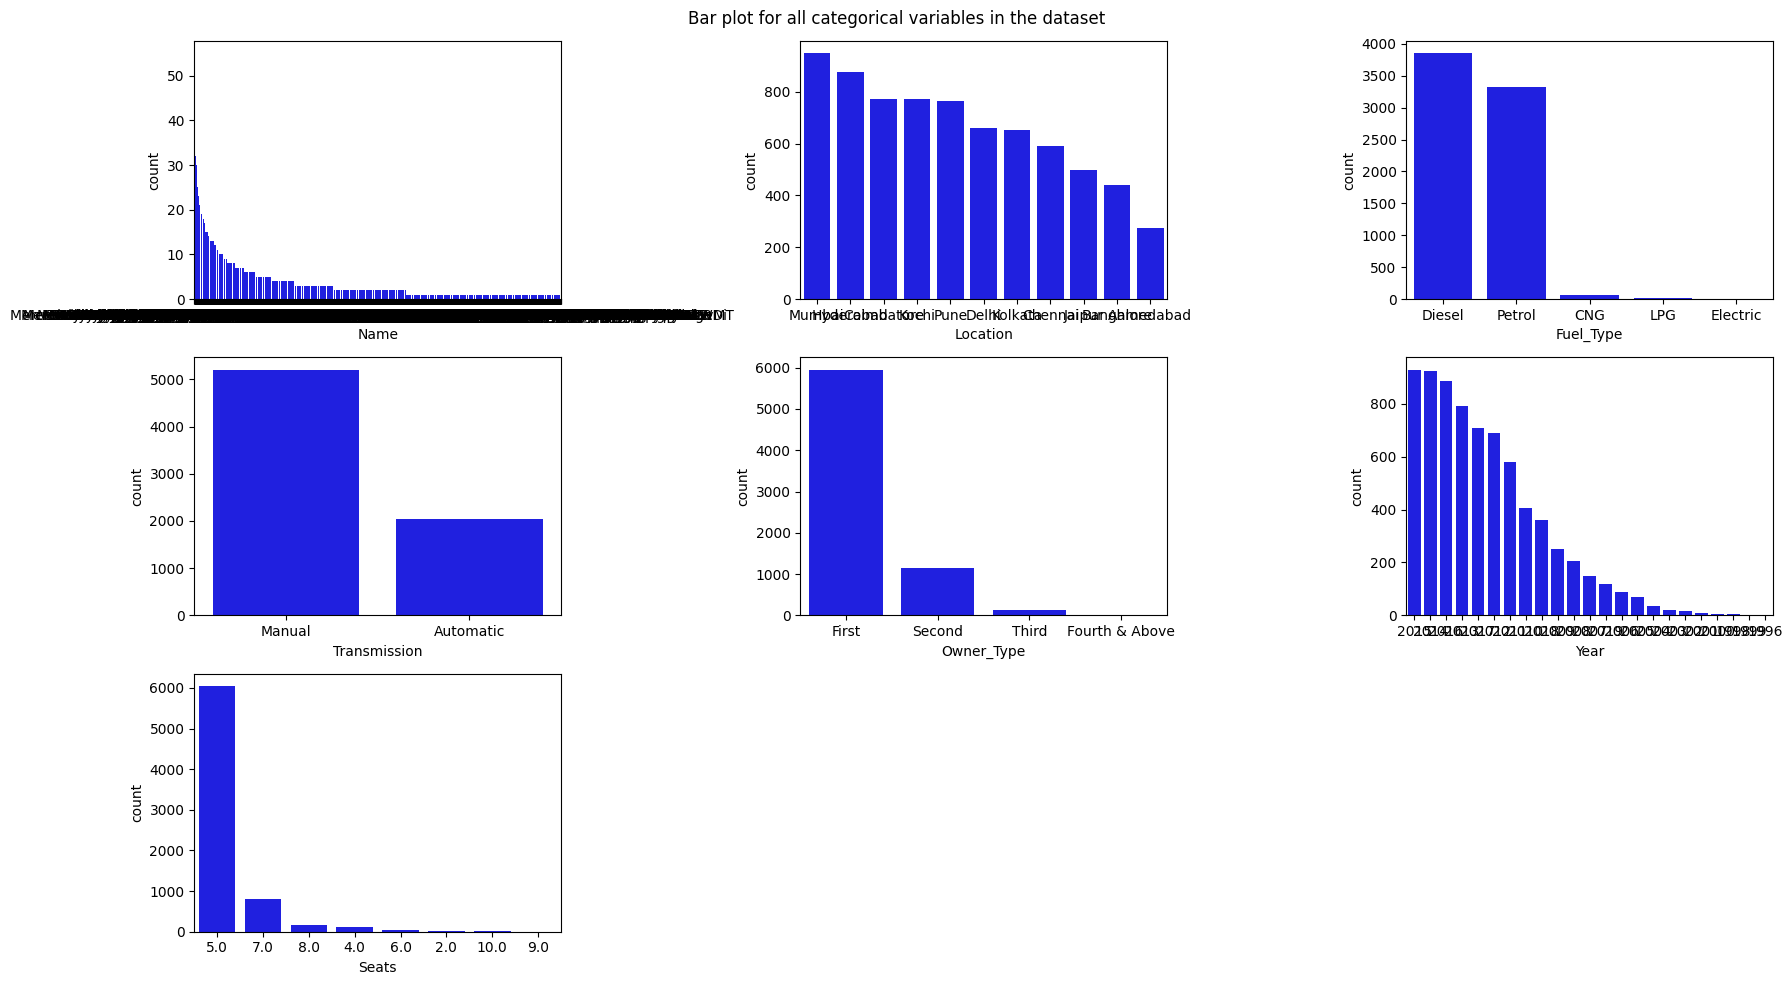

In [18]:
# Univariate analysis for categorical variables

fig, axes = plt.subplots(3,3, figsize = (18, 10))

fig.suptitle('Bar plot for all categorical variables in the dataset')

sns.countplot(ax = axes[0, 0], x = 'Name', data = df, color = 'blue',
              order = df['Name'].value_counts().index);

sns.countplot(ax = axes[0, 1], x = 'Location', data = df, color = 'blue',
              order = df['Location'].value_counts().index);

sns.countplot(ax = axes[0, 2], x = 'Fuel_Type', data = df, color = 'blue',
              order = df['Fuel_Type'].value_counts().index);

sns.countplot(ax = axes[1, 0], x = 'Transmission', data = df, color = 'blue',
              order = df['Transmission'].value_counts().index);

sns.countplot(ax = axes[1, 1], x = 'Owner_Type', data = df, color = 'blue',
              order = df['Owner_Type'].value_counts().index);

sns.countplot(ax = axes[1, 2], x = 'Year', data = df, color = 'blue',
              order = df['Year'].value_counts().index);

sns.countplot(ax = axes[2, 0], x = 'Seats', data = df, color = 'blue',
              order = df['Seats'].value_counts().index);

# Hide unused subplots
axes[2, 1].axis('off')
axes[2, 2].axis('off')

plt.tight_layout()
plt.show()

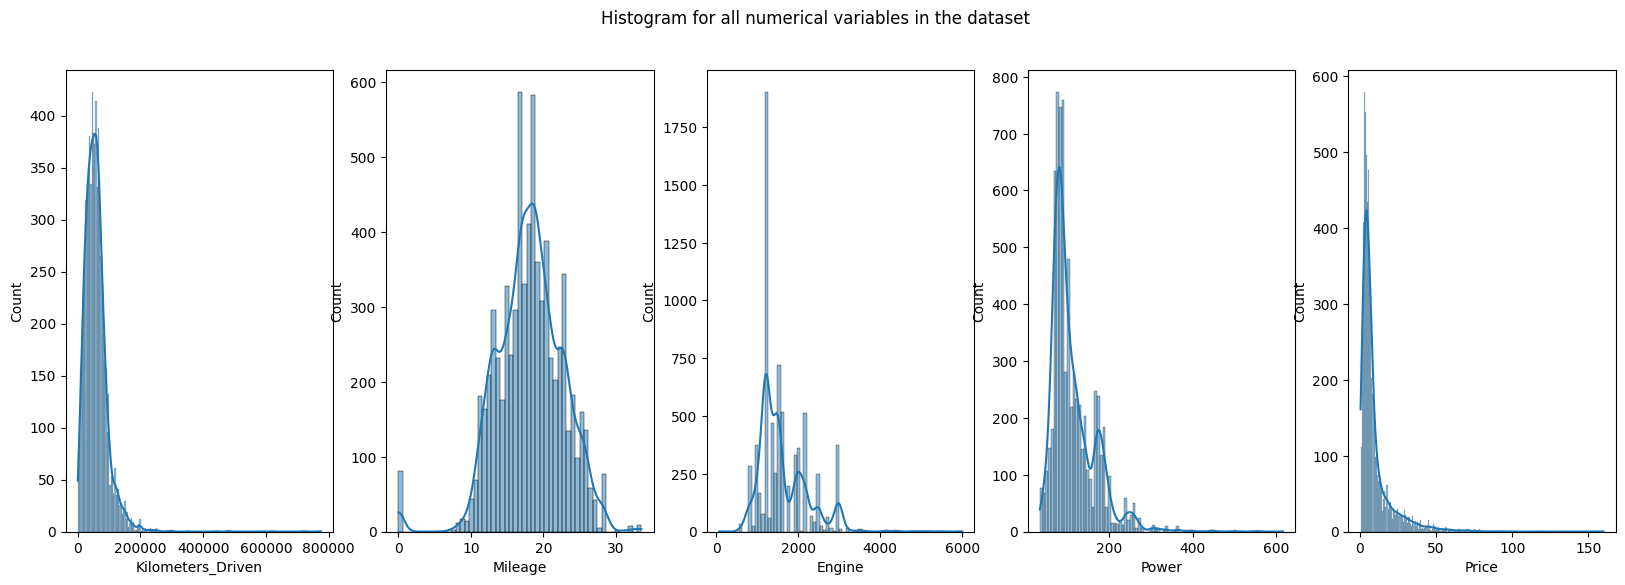

In [19]:
# Univariate analysis for numerical variables

fig, axes = plt.subplots(1, 5, figsize = (20, 6))

fig.suptitle('Histogram for all numerical variables in the dataset')

sns.histplot(x = 'Kilometers_Driven', data = df, kde = True, ax = axes[0]);

sns.histplot(x = 'Mileage', data = df, kde = True, ax = axes[1]);

sns.histplot(x = 'Engine', data = df, kde = True, ax = axes[2]);

sns.histplot(x = 'Power', data = df, kde = True, ax = axes[3]);

sns.histplot(x = 'Price', data = df, kde = True, ax = axes[4]);

* KM Driven is right skewed
* Mileage is a multimodal normal distribution
* Engine is right skewed and multimodal
* Power is right skewed and bimodal
* Price is right skewed
* log_transformation needs to be done for dependent variables: KM driven and price since they're right skewed and for normalization

<Axes: xlabel='KM_Log', ylabel='Count'>

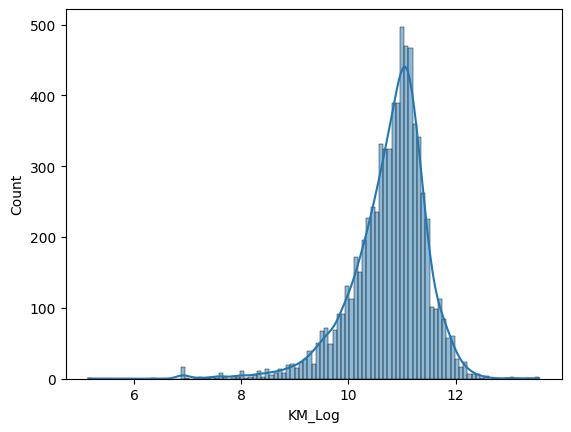

In [20]:
# Log transformation of Kilometers_Driven variable
df['KM_Log'] = np.log(df['Kilometers_Driven'])


# Plotting Engine_New to look at distribution
sns.histplot(data=df, x='KM_Log', kde=True)

<Axes: xlabel='Price_Log', ylabel='Count'>

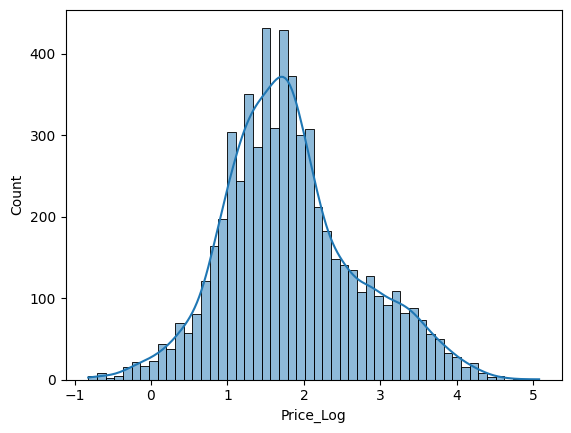

In [21]:
# Log transformation of Price variable
df['Price_Log'] = np.log(df['Price'])

# Plotting Engine_New to look at distribution
sns.histplot(data=df, x='Price_Log', kde=True)

In [22]:
# Checking log columns
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,KM_Log,Price_Log
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,11.184421,0.559616
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,10.621327,2.525729
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,10.736397,1.504077
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,11.373663,1.791759
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,10.613246,2.875822


In [23]:
# Bivariate analysis - create multiple strip-plots of log variables x categorical variables.

def scatterplot_by_category(
    df,
    x_col,
    cat_cols,
    figsize=(6, 4),
    jitter=True,
    alpha=0.6
):

    for col in cat_cols:
        plt.figure(figsize=figsize)
        sns.stripplot(
            x=x_col,
            y=col,
            data=df,
            jitter=jitter,
            alpha=alpha
        )
        plt.title(f"{x_col} vs {col}")
        plt.tight_layout()
        plt.show()

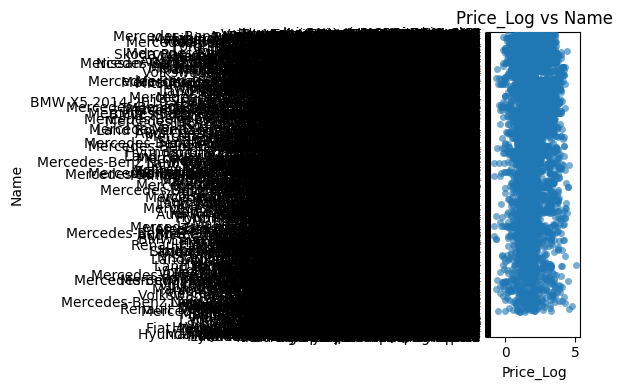

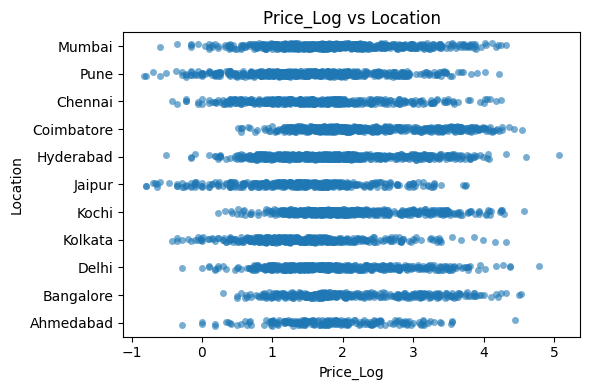

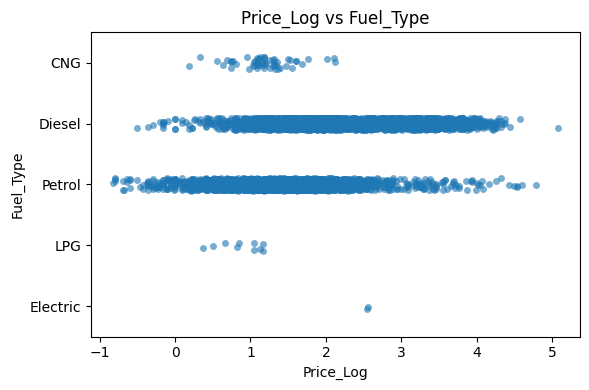

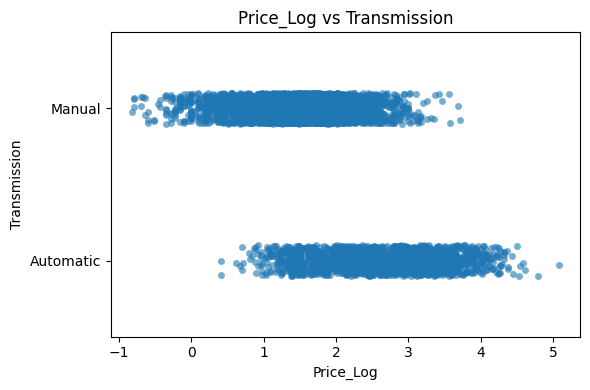

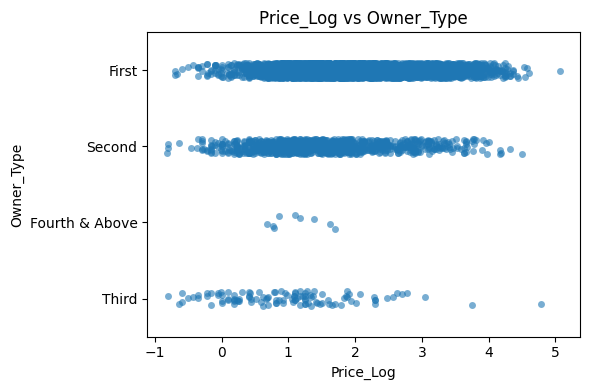

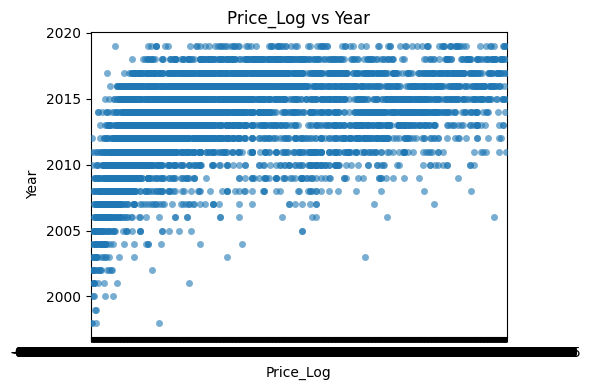

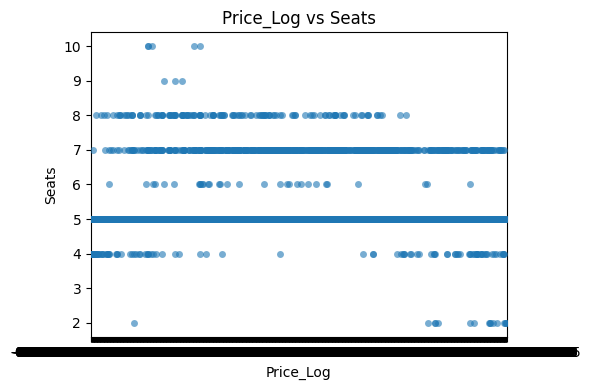

In [24]:
scatterplot_by_category(
    df=df,
    x_col='Price_Log',
    cat_cols=cat_vars
)

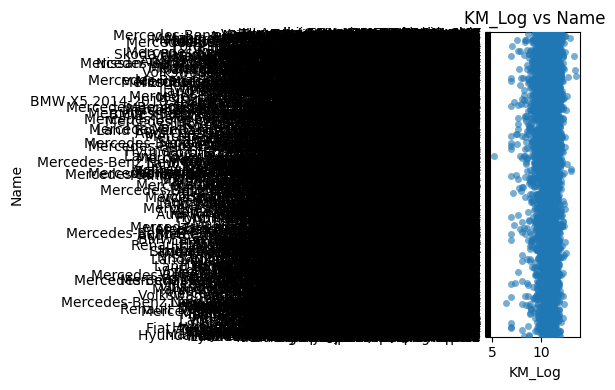

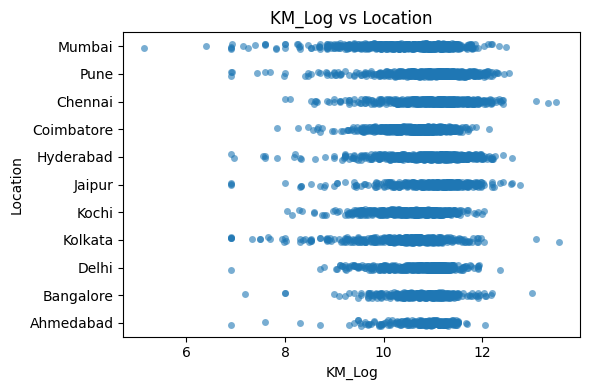

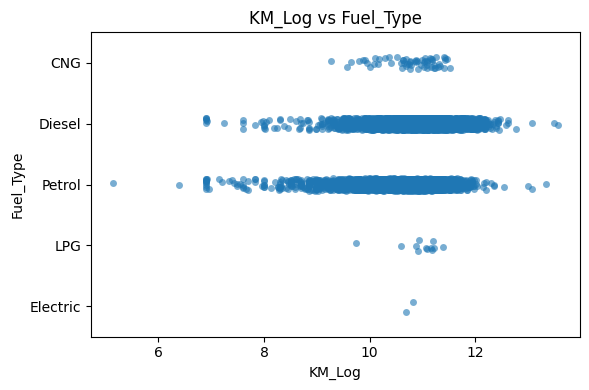

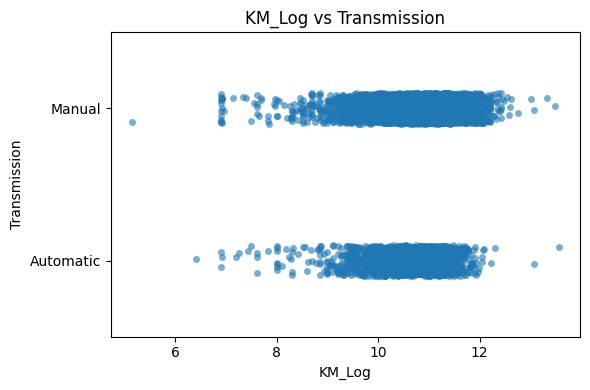

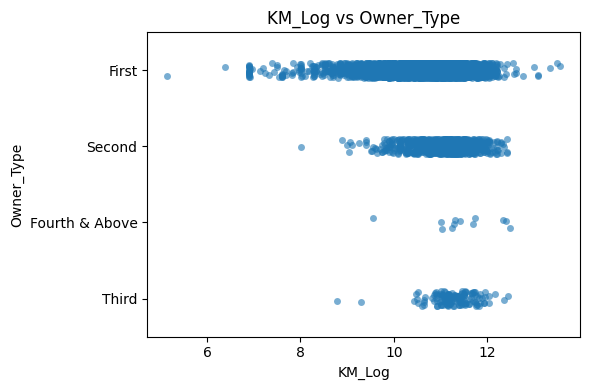

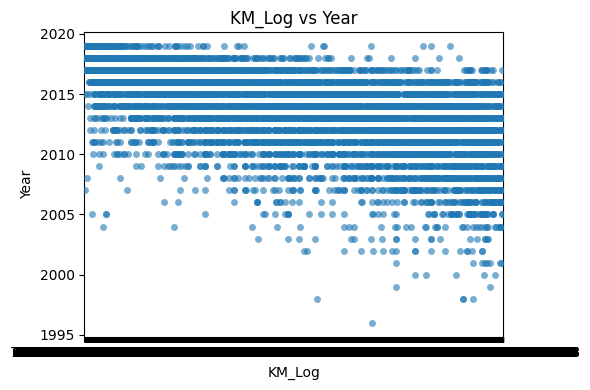

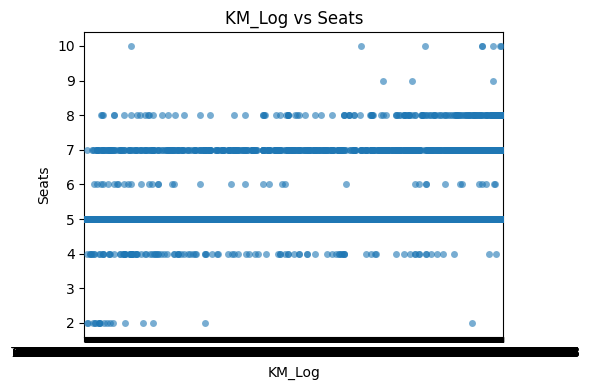

In [25]:
scatterplot_by_category(
    df=df,
    x_col='KM_Log',
    cat_cols=cat_vars
)

* Price log
  * Price log and Year has a positive correlation. As the Year of the car increases, the price increases, which mkaes sense since newer cars would have more value.
  * Price log and Engine has a positive correlation. As Engine increases, the price increases.
  * Price log and Power has a positive correlation. As Power increases, the price increases.
  * Price log and Mileage has a lot of clustered data where mileage is between 10 and 30 especially where price log is between 1 and 2

* Kilometers Driven log
  * KM Driven log and Year has a negative correlation. As the year increases, the KM Driven decreases, which makes sense since newer cars are driven less than older cars
  * KM Driven log & Mileage has clustered data where mileage is between 10 and 30 and KM log is between 10 and 12
  * KM Driven log & Engine has clustered data where Engine is between 1000 and 3000 and KM log is between 10 and 12
  * KM Driven log & Power has clustered data where Power is between 50 and 300 and KM log is between 10 and 12

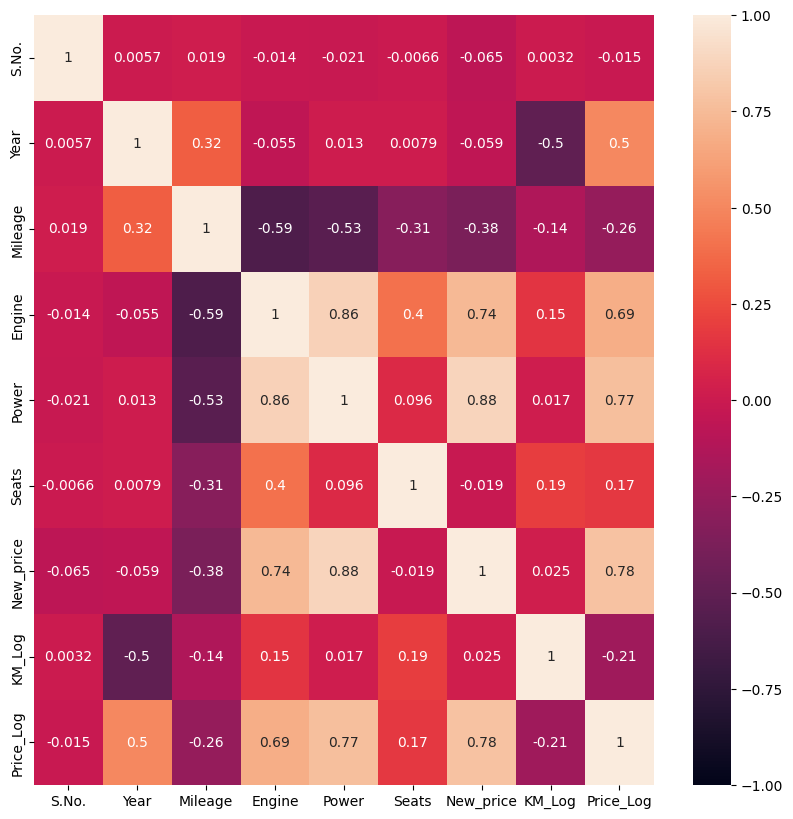

In [26]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.drop(['Kilometers_Driven', 'Price'],axis = 1).corr(numeric_only = True), annot = True, vmin = -1, vmax = 1)
plt.show()

Strong Correlation Observations (>=0.5 or <=-0.5)

* Dependent variable correlations
  * Positive correlation between Price_Log and Power (0.77)
  * Positive correlation between Price_Log and Engine (0.69)
    * The above 2 findings show that power and engine influence the price. It makes sense since the engine is the most important part of the car and power is also a measure of the engine
  * Positive correlation between Price_Log and Year (0.5)
    * The price is dependent on the year since the newer a car, the higher the price
* Independent variable correlations
  * Positive correlation between Power and Engine (0.86)
    * Power and Engine are strongly correlated since they're both measures of engine health
  * Negative correlation between KM_Log and Year (-0.5)
    * This correlates with the scatterplot findings. The older a car, the more it will have been driven/used
  * Negative correlation between Mileage and Engine (-0.59)
  * Negative correlation between Mileage and Power (-0.53)
    * The above 2 findings make sense since the more a car is driven or used, the engine health will decline

In [27]:
# This function takes the categorical column as the input and returns the boxplots for the variable.
def boxplot(z):

    plt.figure(figsize = (12, 5)) # Setting size of boxplot

    sns.boxplot(x = z, y = df['Price']) # Defining x and y

    plt.show()

    plt.figure(figsize = (12, 5))

    plt.title('Without Outliers')

    sns.boxplot(x = z, y = df['Price'], showfliers = False) # Turning off the outliers

    plt.show()

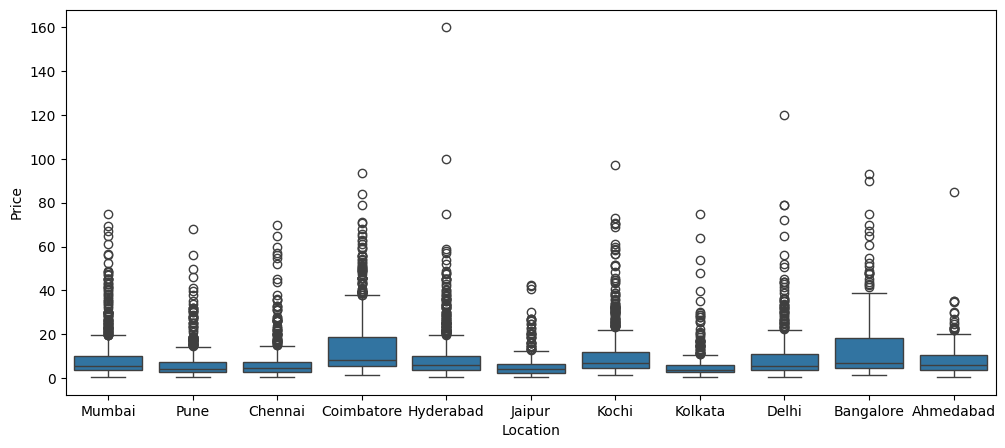

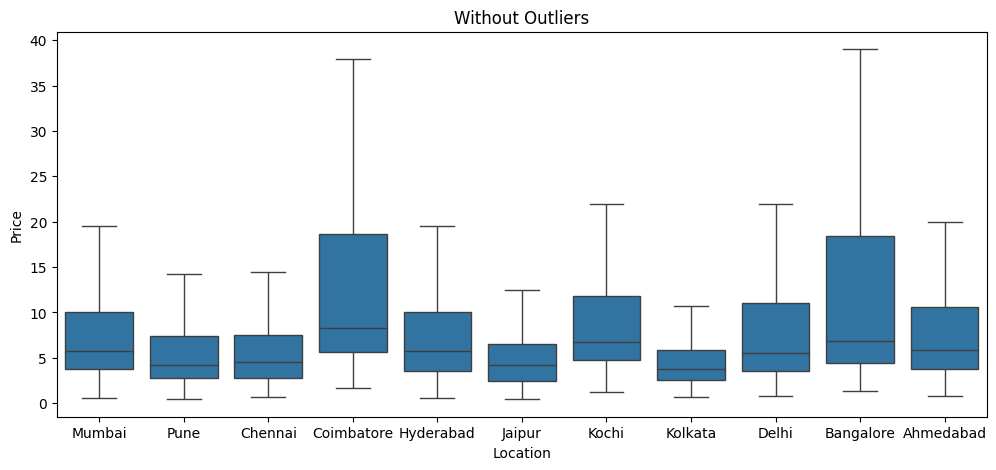

In [28]:
boxplot(df['Location'])

* The medians are all very similar and right skewed across all locations
* Jaipur has the least amount of skew
* Coimbatore and Bangalore have the highest medians, longer dispersions, and longer upper whiskers than all other locations. The price range seems to vary the most in these locations. It might be good to focus on these locations for car resales.
* There are many outliers outside of the upper limit for all locations

In [29]:
# Extract Brand from Name
df["Brand"] = df["Name"].apply(lambda x: x.split(" ")[0].lower())

# Extract Model from Name
df["Model"] = df["Name"].apply(lambda x: x.split(" ")[1].lower())

# Remove Name column
df = df.drop("Name", axis=1)

# Check columns for Brand and Model & Name drop
df.head()

,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,KM_Log,Price_Log,Brand,Model
0,0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,11.184421,0.559616,maruti,wagon
1,1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,10.621327,2.525729,hyundai,creta
2,2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,10.736397,1.504077,honda,jazz
3,3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,11.373663,1.791759,maruti,ertiga
4,4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,10.613246,2.875822,audi,a4


In [30]:
# Show rows where null values in Mileage for missing values treatment
df[df['Mileage'].isnull()]

,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,KM_Log,Price_Log,Brand,Model
4446,4446,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.58,13.00,10.819778,2.564949,mahindra,e
4904,4904,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,NaN,12.75,10.691945,2.545531,toyota,prius


In [31]:
# Impute Mileage and fill with median value
df['Mileage'] = (df['Mileage'].fillna(df['Mileage'].median))

In [32]:
# Check if null values in Mileage
df[df['Mileage'].isnull()]

,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,KM_Log,Price_Log,Brand,Model


In [33]:
# Show rows where null values in Seats
df[df['Seats'].isnull()]

,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,KM_Log,Price_Log,Brand,Model
194,194,Ahmedabad,2007,60006,Petrol,Manual,First,0.0,NaN,NaN,NaN,NaN,2.95,11.002200,1.081805,honda,city
208,208,Kolkata,2010,42001,Petrol,Manual,First,16.1,NaN,NaN,NaN,NaN,2.11,10.645449,0.746688,maruti,swift
229,229,Bangalore,2015,70436,Diesel,Manual,First,0.0,1498.0,99.0,NaN,NaN,3.60,11.162460,1.280934,ford,figo
733,733,Chennai,2006,97800,Petrol,Manual,Third,16.1,NaN,NaN,NaN,NaN,1.75,11.490680,0.559616,maruti,swift
749,749,Mumbai,2008,55001,Diesel,Automatic,Second,0.0,NaN,NaN,NaN,NaN,26.50,10.915107,3.277145,land,rover
1294,1294,Delhi,2009,55005,Petrol,Manual,First,12.8,NaN,NaN,NaN,NaN,3.20,10.915179,1.163151,honda,city
1327,1327,Hyderabad,2015,50295,Petrol,Manual,First,16.1,NaN,NaN,NaN,NaN,5.80,10.825661,1.757858,maruti,swift
1385,1385,Pune,2004,115000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,1.50,11.652687,0.405465,honda,city
1460,1460,Coimbatore,2008,69078,Petrol,Manual,First,0.0,NaN,NaN,NaN,NaN,40.88,11.142992,3.710641,land,rover
1917,1917,Jaipur,2005,88000,Petrol,Manual,Second,13.0,1493.0,100.0,NaN,NaN,1.70,11.385092,0.530628,honda,city


In [34]:
# Impute Seats and fill with median value
df['Seats'] = (df['Seats'].fillna(df['Seats'].median))

In [35]:
# Check if null values in seats
df[df['Seats'].isnull()]

,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,KM_Log,Price_Log,Brand,Model


In [36]:
# Show rows where null values in Engine
df[df['Engine'].isnull()]

,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,KM_Log,Price_Log,Brand,Model
194,194,Ahmedabad,2007,60006,Petrol,Manual,First,0.0,NaN,NaN,<bound method Series.median of 0 5.0\n1 ...,NaN,2.95,11.002200,1.081805,honda,city
208,208,Kolkata,2010,42001,Petrol,Manual,First,16.1,NaN,NaN,<bound method Series.median of 0 5.0\n1 ...,NaN,2.11,10.645449,0.746688,maruti,swift
733,733,Chennai,2006,97800,Petrol,Manual,Third,16.1,NaN,NaN,<bound method Series.median of 0 5.0\n1 ...,NaN,1.75,11.490680,0.559616,maruti,swift
749,749,Mumbai,2008,55001,Diesel,Automatic,Second,0.0,NaN,NaN,<bound method Series.median of 0 5.0\n1 ...,NaN,26.50,10.915107,3.277145,land,rover
1294,1294,Delhi,2009,55005,Petrol,Manual,First,12.8,NaN,NaN,<bound method Series.median of 0 5.0\n1 ...,NaN,3.20,10.915179,1.163151,honda,city
1327,1327,Hyderabad,2015,50295,Petrol,Manual,First,16.1,NaN,NaN,<bound method Series.median of 0 5.0\n1 ...,NaN,5.80,10.825661,1.757858,maruti,swift
1385,1385,Pune,2004,115000,Petrol,Manual,Second,0.0,NaN,NaN,<bound method Series.median of 0 5.0\n1 ...,NaN,1.50,11.652687,0.405465,honda,city
1460,1460,Coimbatore,2008,69078,Petrol,Manual,First,0.0,NaN,NaN,<bound method Series.median of 0 5.0\n1 ...,NaN,40.88,11.142992,3.710641,land,rover
2074,2074,Pune,2011,24255,Petrol,Manual,First,16.1,NaN,NaN,<bound method Series.median of 0 5.0\n1 ...,NaN,3.15,10.096378,1.147402,maruti,swift
2096,2096,Coimbatore,2004,52146,Petrol,Manual,First,0.0,NaN,NaN,<bound method Series.median of 0 5.0\n1 ...,NaN,1.93,10.861803,0.657520,hyundai,santro


In [37]:
# Impute Engine and fill with mean value
df['Engine'] = (df['Engine'].fillna(df['Engine'].mean))

In [38]:
# Check if null values in engine
engine_missing_data = df[df['Engine'].isnull()]
print(engine_missing_data)

Empty DataFrame
Columns: [S.No., Location, Year, Kilometers_Driven, Fuel_Type, Transmission, Owner_Type, Mileage, Engine, Power, Seats, New_price, Price, KM_Log, Price_Log, Brand, Model]
Index: []


In [39]:
# Show rows where null values in Power
df[df['Power'].isnull()]


,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,KM_Log,Price_Log,Brand,Model
76,76,Jaipur,2008,111111,Diesel,Manual,First,17.8,1399.0,NaN,5.0,NaN,2.00,11.618285,0.693147,ford,fiesta
79,79,Hyderabad,2005,87591,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.30,11.380434,0.262364,hyundai,santro
89,89,Hyderabad,2007,73745,Petrol,Manual,First,17.0,1086.0,NaN,5.0,NaN,2.10,11.208368,0.741937,hyundai,santro
120,120,Mumbai,2005,102000,Petrol,Manual,Second,17.0,1086.0,NaN,5.0,NaN,0.85,11.532728,-0.162519,hyundai,santro
143,143,Kochi,2008,80759,Petrol,Manual,Third,17.0,1086.0,NaN,5.0,NaN,1.67,11.299225,0.512824,hyundai,santro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6896,6896,Hyderabad,2013,86000,Diesel,Manual,First,23.59,1364.0,NaN,5.0,NaN,NaN,11.362103,NaN,toyota,etios
6902,6902,Kochi,2012,59311,Petrol,Manual,First,18.3,<bound method Series.mean of 0 998.0\n1...,NaN,<bound method Series.median of 0 5.0\n1 ...,NaN,NaN,10.990550,NaN,toyota,etios
6947,6947,Delhi,2012,77800,Petrol,Manual,First,18.3,1197.0,NaN,5.0,NaN,NaN,11.261897,NaN,toyota,etios
7092,7092,Coimbatore,2007,64168,Petrol,Automatic,First,17.0,1086.0,NaN,5.0,NaN,NaN,11.069260,NaN,hyundai,santro


In [40]:
# Impute Power and fill with mean value
df['Power'] = (df['Power'].fillna(df['Power'].mean))

In [41]:
# Check if null values in power
df[df['Power'].isnull()]

,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,KM_Log,Price_Log,Brand,Model


In [42]:
# Remove New_price column
df = df.drop("New_price", axis=1)

In [43]:
# Check if New_price was dropped
df.head()

,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,KM_Log,Price_Log,Brand,Model
0,0,Mumbai,2010,72000,CNG,Manual,First,26.6,998.0,58.16,5.0,1.75,11.184421,0.559616,maruti,wagon
1,1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.2,5.0,12.50,10.621327,2.525729,hyundai,creta
2,2,Chennai,2011,46000,Petrol,Manual,First,18.2,1199.0,88.7,5.0,4.50,10.736397,1.504077,honda,jazz
3,3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,11.373663,1.791759,maruti,ertiga
4,4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968.0,140.8,5.0,17.74,10.613246,2.875822,audi,a4


In [44]:
# Show rows where null values in Price
df[df['Price'].isnull()]


,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,KM_Log,Price_Log,Brand,Model
6019,6019,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.2,4.0,NaN,10.619594,NaN,maruti,alto
6020,6020,Coimbatore,2013,54493,Petrol,Manual,Second,24.7,796.0,47.3,5.0,NaN,10.905828,NaN,maruti,alto
6021,6021,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.8,7.0,NaN,10.434116,NaN,toyota,innova
6022,6022,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,<bound method Series.mean of 0 58.16\n1...,5.0,NaN,11.842229,NaN,toyota,etios
6023,6023,Mumbai,2014,29000,Petrol,Manual,First,18.5,1197.0,82.85,5.0,NaN,10.275051,NaN,hyundai,i20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,11.400999,NaN,volkswagen,vento
7249,7249,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,10.985293,NaN,volkswagen,polo
7250,7250,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,10.239960,NaN,nissan,micra
7251,7251,Pune,2013,52262,Petrol,Automatic,Third,17.2,1197.0,103.6,5.0,NaN,10.864025,NaN,volkswagen,polo


In [45]:
# Remove rows where price is null
df = df.dropna()

In [46]:
# Check if rows where price is null were removed
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6018 entries, 0 to 6018
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              6018 non-null   int64  
 1   Location           6018 non-null   object 
 2   Year               6018 non-null   int64  
 3   Kilometers_Driven  6018 non-null   int64  
 4   Fuel_Type          6018 non-null   object 
 5   Transmission       6018 non-null   object 
 6   Owner_Type         6018 non-null   object 
 7   Mileage            6018 non-null   object 
 8   Engine             6018 non-null   object 
 9   Power              6018 non-null   object 
 10  Seats              6018 non-null   object 
 11  Price              6018 non-null   float64
 12  KM_Log             6018 non-null   float64
 13  Price_Log          6018 non-null   float64
 14  Brand              6018 non-null   object 
 15  Model              6018 non-null   object 
dtypes: float64(3), int64(3), obje

1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. 3. We will drop categorical features like Name.
4. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
5. Build Regression models using train data.
6. Evaluate the model performance.

In [47]:
# Split Dataset
X = df.drop(['Price','Price_Log','Kilometers_Driven', 'Mileage', 'Engine', 'Power'], axis = 1)
y = df[["Price", "Price_Log"]]

# Get dummies
X = pd.get_dummies(X, drop_first = True)

# Split data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 0)

In [48]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6018 entries, 0 to 6018
Columns: 268 entries, S.No. to Model_zest
dtypes: bool(265), float64(1), int64(2)
memory usage: 1.7 MB
None


In [49]:
# Function for calculating r2_score and RMSE on train and test data
# This function takes model as an input on which we have trained particular algorithm
# The categorical column as the input and returns the boxplots and histograms for the variable

def get_model_score(model, flag = True):
    '''
    model : regressor to predict values of X

    '''
    # Defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train)

    pred_train_ = np.exp(pred_train)

    pred_test = model.predict(X_test)

    pred_test_ = np.exp(pred_test)

    train_r2 = metrics.r2_score(y_train['Price'], pred_train_)

    test_r2 = metrics.r2_score(y_test['Price'], pred_test_)

    train_rmse = np.sqrt(metrics.mean_squared_error(y_train['Price'], pred_train_))

    test_rmse = np.sqrt(metrics.mean_squared_error(y_test['Price'], pred_test_))

    # Adding all scores in the list
    score_list.extend((train_r2, test_r2, train_rmse, test_rmse))

    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag == True:

        print("R-square on training set : ", metrics.r2_score(y_train['Price'], pred_train_))

        print("R-square on test set : ", metrics.r2_score(y_test['Price'], pred_test_))

        print("RMSE on training set : ", np.sqrt(metrics.mean_squared_error(y_train['Price'], pred_train_)))

        print("RMSE on test set : ", np.sqrt(metrics.mean_squared_error(y_test['Price'], pred_test_)))

    # Returning the list with train and test scores
    return score_list

# Linear Regression Model

In [50]:
# Create a linear regression model
lr = LinearRegression()

In [51]:
# Fit linear regression model
lr.fit(X_train, y_train['Price_Log'])

LinearRegression()

In [52]:
# Get score of the model
lr_score = get_model_score(lr)

R-square on training set :  0.9211776574576285
R-square on test set :  0.8675633590334781
RMSE on training set :  3.0964980974156826
RMSE on test set :  4.175470208532798


* R-square on training set is 92.1% which shows a strong fit
* R-square on test set is 86.8% which is also strong but lower than R-square on training set
* RMSE for test set is slightly higher than the training error but the numbers are pretty close. This shows that the model performs a little worse on the test data but the difference is not that large
* Improvements can definitely be made

# Ridge

In [53]:
# Import Ridge/ Lasso Regression from sklearn
from sklearn.linear_model import Ridge, Lasso

In [54]:
# Create a Ridge regression model
ridge = Ridge(alpha=1.0)

In [55]:
# Fit Ridge regression model
ridge.fit(X_train,y_train['Price_Log'])

Ridge()

In [56]:
# Get score of the model
ridge_score = get_model_score(ridge)

R-square on training set :  0.9024402056469353
R-square on test set :  0.8832391879550543
RMSE on training set :  3.4449394012008585
RMSE on test set :  3.9205758844580476


* R-square on training set is 90.2% which is good
* Test score is 88.3% which is also good and similar to train score
* RMSE on training set is 3.44
* RMSE on test set is similar to training set around 3.92
* The test error is slightly higher than training but they are very close
* Ridge model has minimal overfitting and better generalization than LR model

# Lasso

In [57]:
# Create lasso regression model
lasso=Lasso(alpha=1.0)

In [58]:
# Fit Lasso regression model
lasso.fit(X_train,y_train['Price_Log'])

Lasso()

In [59]:
# Get score of the model
lasso_score = get_model_score(lasso)

R-square on training set :  -0.039340035034471255
R-square on test set :  -0.04808215581306685
RMSE on training set :  11.244107186022896
RMSE on test set :  11.74624281818039


* Results are very poor compared to LR or Ridge models
* Underfitting issue

# Decision Tree

In [60]:
# Import Decision tree for Regression from sklearn
from sklearn.tree import DecisionTreeRegressor

In [61]:
# Create a decision tree regression model, use random_state = 1
dtree = DecisionTreeRegressor(random_state = 1)

In [62]:
# Fit decision tree regression model
dtree.fit(X_train, y_train['Price_Log'])

DecisionTreeRegressor(random_state=1)

In [63]:
# Get score of the model
Dtree_model = get_model_score(dtree)

R-square on training set :  1.0
R-square on test set :  0.7092238564171407
RMSE on training set :  2.6169012807962483e-15
RMSE on test set :  6.187008277719647


* R-square on training set is 100% which is perfect
* R-square on testing set is 70.9% which is less than training set
* The R-square results on both training and test confirms that there is an overfitting issue
* RMSE on training set is very close to 0, means it's not generalizing well
* RMSE on test set is 6.19 which is significantly higher than training set, confirming overfitting
* Random forest may have better performance

In [64]:
#Feature Importance
print(pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                          Imp
Transmission_Manual  0.377529
Year                 0.209727
Fuel_Type_Petrol     0.081204
Seats_7.0            0.026959
Brand_toyota         0.026039
...                       ...
Model_tt             0.000000
Model_xylo           0.000000
Model_xuv300         0.000000
Model_xj             0.000000
Model_z4             0.000000

[268 rows x 1 columns]


* Transmission Manual is the most important feature, followed by Year, and Fuel Type Petrol
* The rest have almost no importance

# Random Forest

In [65]:
# Import Randomforest for Regression from sklearn
from sklearn.ensemble import RandomForestRegressor

In [66]:
# Create a Randomforest regression model
rand = RandomForestRegressor(n_estimators=100)

In [67]:
# Fit Randomforest regression model
rand.fit(X_train, y_train['Price_Log'])

RandomForestRegressor()

In [68]:
# Get score of the model
rand_model = get_model_score(rand)

R-square on training set :  0.9544615217975709
R-square on test set :  0.7846375562735679
RMSE on training set :  2.353614903133404
RMSE on test set :  5.324591519510129


* R-square on training set is 95% which is good
* R-square on testing set is 78.4% which is a pretty big difference from training
* RMSE on training set is 2.46
* RMSE on test set is 5.33
* The test RMSE is higher than training which may suggest overfitting
* Random Forest is performing better than Decision Tree

In [69]:
# Feature Importance
print(pd.DataFrame(rand.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                          Imp
Transmission_Manual  0.376640
Year                 0.212531
Fuel_Type_Petrol     0.053618
Fuel_Type_Diesel     0.046272
Seats_7.0            0.026268
...                       ...
Model_fusion         0.000000
Model_platinum       0.000000
Model_redi           0.000000
Model_sl-class       0.000000
Model_xuv300         0.000000

[268 rows x 1 columns]


* Most important features are Transmission Manual and Year
* Fuel Type petrol and diesel have impact on price but much less impact than Transmission Manual and Year
* Similar important features to Decision Tree

In [70]:
# Defining list of models you have trained
models = [lr, ridge, lasso, dtree, rand]

# Defining empty lists to add train and test results
r2_train = []
r2_test = []
rmse_train = []
rmse_test = []

# Looping through all the models to get the rmse and r2 scores
for model in models:

    # Accuracy score
    j = get_model_score(model, False)

    r2_train.append(j[0])

    r2_test.append(j[1])

    rmse_train.append(j[2])

    rmse_test.append(j[3])

In [71]:
comparison_frame = pd.DataFrame({'Model':['Linear Regression','Ridge','Lasso','Decision Tree','Random forest'],
                                          'Train_r2': r2_train,'Test_r2': r2_test,
                                          'Train_RMSE': rmse_train,'Test_RMSE': rmse_test})
comparison_frame

,Model,Train_r2,Test_r2,Train_RMSE,Test_RMSE
0,Linear Regression,0.921178,0.867563,3.096498e+00,4.175470
1,Ridge,0.902440,0.883239,3.444939e+00,3.920576
2,Lasso,-0.039340,-0.048082,1.124411e+01,11.746243
3,Decision Tree,1.000000,0.709224,2.616901e-15,6.187008
4,Random forest,0.954462,0.784638,2.353615e+00,5.324592


* Linear Regression and Ridge Regression have performed the best
* Lasso performed the worst
* To improve Linear Regression and Ridge Regression models, I could check for multicollinearity

# Refined insights:

  * Ridge regression and linear regression had the best performance
  * The top 7 locations make up ~75% so maybe there should be a focus on these locations
  * Fuel Type of cars are mainly Diesel and Petrol so there's no need to source used cars that don't use these fuel types
  * If Owner Type is not first, it seems less likely to sell
  * Majority of used cars are 2011 and newer (~70%) but not too new. 2018 and 2019 were much lower. This should be kept in mind. Maybe cars that are 10+ years old should be avoided.
  * 84% percent of the cars have 5 seats. There should be a focus on cars that have 5 seats.
  * Coimbatore and Bangalore seem to be expensive areas
  * Price and Year seem to have a strong correlation

# Proposal for the final solution design:
  * The ridge regression should be adopted because it had minimal overfitting compared to all of the other models and better generalization. Also, if more features are added to the data sets, ridge model would handle it better than linear regression.